In [11]:
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow import layers
print(tf.__version__)

1.13.1


In [12]:
# dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
# dataset_path

In [13]:
col_name=['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin'] 
#=> replaced with np.nan
raw_dataset = pd.read_csv('auto-mpg.data', names=col_name,na_values="?",
            comment='\t',sep=" ", skipinitialspace=True)

In [14]:
# col_name=['MPG','Cylinders','Displacement','Horsepower','Weight',
#                 'Acceleration', 'Model Year', 'Origin'] 
# raw_dataset = pd.read_csv(, names=col_name,na_values="?",
#             comment='\t',sep=" ", skipinitialspace=True)
raw_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [6]:
dataset =  raw_dataset.copy()

In [15]:
dataset.dropna(inplace=True)

In [10]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [16]:
# Splitting data into Y (Target) - Classification
origin = dataset.pop('Origin')

In [17]:
#(origin == 1) : It will True for origin==1 for others 0
#(origin == 2) : It will True for origin==2 for others 0
#(origin == 3) : It will True for origin==3 for others 0
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0

In [18]:
# cross-validation splitting into training & testing
# frac = 0.8 (Take 80% of sample)
train_dataset = dataset.sample(frac=0.8,random_state=0)
# train_dataset.index-  remove the training rows
test_dataset = dataset.drop(train_dataset.index)

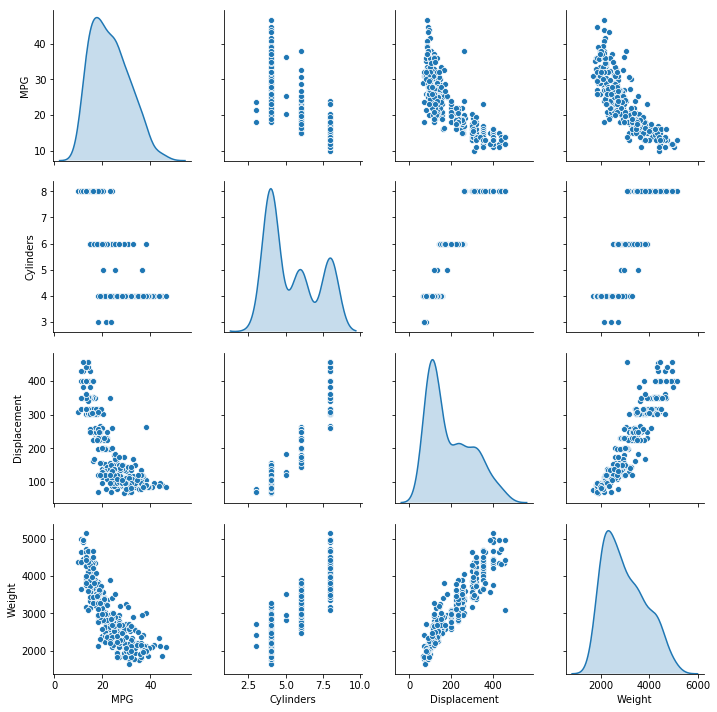

In [19]:
sns.pairplot(train_dataset[["MPG","Cylinders","Displacement",
                            "Weight"]],diag_kind='kde')

C:\newAnaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\newAnaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


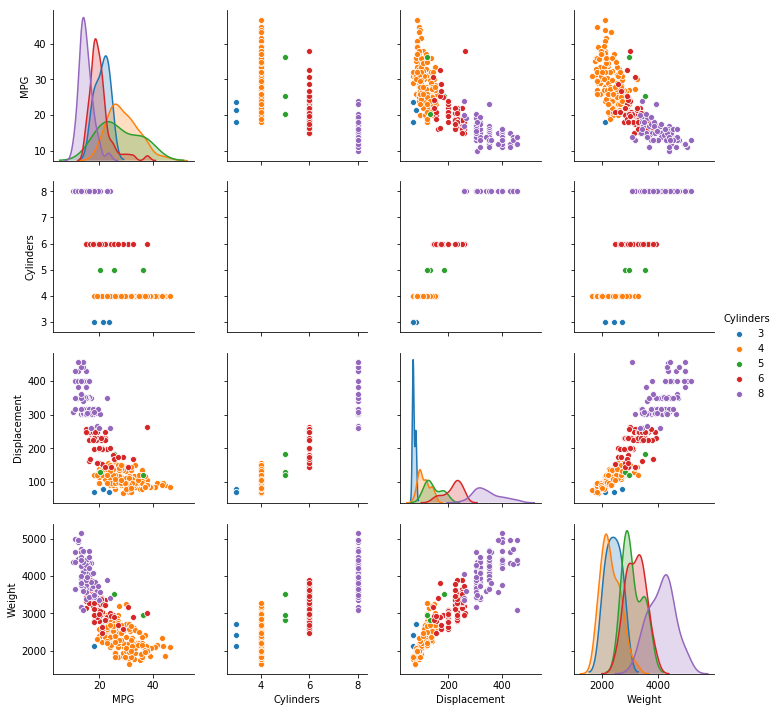

In [20]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", 
                            "Weight"]], diag_kind='kde',
             hue='Cylinders')

In [21]:
# Statistics about the training dataset train_dataset.describe()
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
